In [70]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#Given functions
def get_a(deg_true):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y

### Problem 7

In [72]:
#Define the polynomial size
p = 5

#Get a value for a 
a = get_a(p)

#Generate training and test data
x_train, y_train = draw_sample(p,a,10)
x_test, y_test = draw_sample(p,a,1000)

#Generate design matrices
X_train = get_design_mat(x_train, p)
X_test = get_design_mat(x_test, p)

In [73]:
#Define our least squares estimator function
def least_squares_estimator(X, y):
    """
    Inputs:
    X: (np.matrix of size N x (deg_true +1))
    y: (np.array) of size deg_true + 1 x 1
    
    Returns:
    b_hat: (np.array) of size N x (deg_true + 1)
    """
    #Make sure N > d
    if X.shape[0] < X.shape[1]:
        raise ValueError("You must have at least as many rows as columns!")
    else:
        #Compute the solution for b using the closed form linear algebra solution
        b_hat = np.linalg.inv(X.T@X) @ X.T @ y
        return b_hat

### Problem 8

In [74]:
def empirical_risk(X,y,b_hat):
    """
    Inputs:
    X: (np.matrix of size N x (deg_true +1))
    y: (np.array) of size deg_true + 1 x 1
    b_hat: (np.array) of size N x (deg_true + 1)
    Returns:
    emp_risk: (float) 
    """
    #Get # of observations
    N = X.shape[0]
    #Calculate Predictions
    y_hat = X @ b_hat
    #Calculate squared errors and then empirical risk
    sum_of_squared_errors = sum((y_hat-y)**2)
    emp_risk = sum_of_squared_errors / N 
    return emp_risk

### Problem 9

In [75]:
#Calculate b_hat
b_hat = least_squares_estimator(X_train,y_train)

In [76]:
#Compare a and b_hat values
for i in range(len(b_hat)):
    print('Values at Index', i, 'For Vectors b_Hat and a',a[i],b_hat[i])
    print("Difference rounded to 5 decimal places:", np.round(a[i]-b_hat[i],5))

Values at Index 0 For Vectors b_Hat and a 2.1312987714795564 2.1312987719444907
Difference rounded to 5 decimal places: -0.0
Values at Index 1 For Vectors b_Hat and a 2.2527697183083157 2.252769719289315
Difference rounded to 5 decimal places: -0.0
Values at Index 2 For Vectors b_Hat and a -0.4043830464384541 -0.40438304852730766
Difference rounded to 5 decimal places: 0.0
Values at Index 3 For Vectors b_Hat and a 1.4645698259496918 1.4645698275513723
Difference rounded to 5 decimal places: -0.0
Values at Index 4 For Vectors b_Hat and a -0.33479833911116175 -0.3347983414639657
Difference rounded to 5 decimal places: 0.0
Values at Index 5 For Vectors b_Hat and a -5.705853644344385 -5.705853643658315
Difference rounded to 5 decimal places: -0.0


In [77]:
#Use a helper function to make the graphing easier
def helper_func(x, degree):
    return np.array([x**i for i in range(degree+1)])

The function is well estimated,           and therefore not visible on the graph as it is covered       up by the original function g(x)


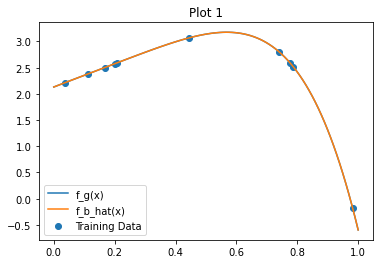

In [89]:
#Plot b_hat predictions vs A
x = np.linspace(0,1,100)
func_g = a@ helper_func(x,p)
b_hat_x = b_hat @ helper_func(x,p)
plt.scatter(x_train,y_train)

#B_hat predictions given
plt.plot(x, b_hat_x)
plt.plot(x, func_g)
plt.legend(labels=['f_g(x)','f_b_hat(x)','Training Data'])
plt.title("Plot 1")
print("The function is well estimated, \
          and therefore not visible on the graph as it is covered \
      up by the original function g(x)" )

### Problem 10

In [11]:
#Iterate through values 1-> 10, which will be 
#the degree of our polynomial used to predict y
for i in range(1,10):
    
    #Get new design matrices for polynomial i
    X_train = get_design_mat(x_train, i)
    X_test = get_design_mat(x_test, i)
    
    #Calculate best coefficient for each term
    new_b_hat = least_squares_estimator(X_train, y_train)
    
    #Calculate empirical risk for polynomial degree i
    #Use the test set that we generated
    current_risk = empirical_risk(X_test,y_test,new_b_hat)
    print("Empirical Risk for Polynomial Degree", i, "is:",current_risk)    

Empirical Risk for Polynomial Degree 1 is: 0.42266186450754245
Empirical Risk for Polynomial Degree 2 is: 0.030140763526805
Empirical Risk for Polynomial Degree 3 is: 0.0008178082780607788
Empirical Risk for Polynomial Degree 4 is: 7.244750457533657e-06
Empirical Risk for Polynomial Degree 5 is: 1.450802559459148e-20
Empirical Risk for Polynomial Degree 6 is: 2.960600855214283e-16
Empirical Risk for Polynomial Degree 7 is: 4.037909929254541e-09
Empirical Risk for Polynomial Degree 8 is: 0.018985229249680206
Empirical Risk for Polynomial Degree 9 is: 0.20344433933934028


### Problem 11

In [129]:
def noisy_emp_and_gen_risk(d,x_train,y_train, x_test,y_test):
    """
    Inputs:
    d: (int) degree of polynomial desired
    n: (int) number of samples to be generated in 
    
    Outputs:
    training_error: (float) average sum of squares of loss function on training data
    generalization_error: (float) average Sum of Squares of loss function on test data
    """
    #Generate design matrices
    X_train = get_design_mat(x_train, d)
    X_test = get_design_mat(x_test, d)
    #Calculate b_hat
    b_hat = least_squares_estimator(X_train, y_train)
    training_error = empirical_risk(X_train, y_train, b_hat)
    generalization_error = empirical_risk(X_test, y_test, b_hat)
    
    return training_error, generalization_error

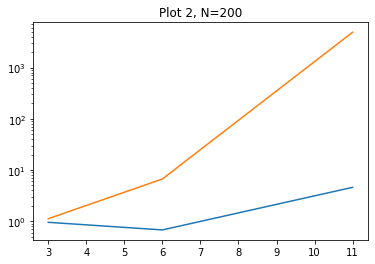

In [163]:
#Generate noisy data for polynomial of degree 5, with N = 200
d = 5
a = get_a(d)
x_train, y_train = draw_sample_with_noise(d,a,20)
x_test, y_test = draw_sample_with_noise(d,a,180)

#Iterate over polynomials with
#d = 2,5,10 and calculate errors
polynomials = [3,6,11]
te_arr_200 = []
ge_arr_200 = []

#Generate empirical risk and generalization error
#For polynomials of various size [2,5,10]
for d in polynomials:
    train_error, gen_error = noisy_emp_and_gen_risk(d,x_train,y_train, x_test,y_test)
    te_arr_200.append(train_error)
    ge_arr_200.append(gen_error)

plt.plot(polynomials, te_arr_200)
plt.plot(polynomials, ge_arr_200)
plt.title("Plot 2, N=200")
plt.yscale('log')

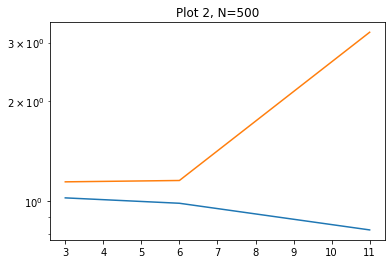

In [164]:
#Generate noisy data for polynomial of degree 5, with N = 500
d = 5
a = get_a(d)
x_train, y_train = draw_sample_with_noise(d,a,50)
x_test, y_test = draw_sample_with_noise(d,a,450)

te_arr_500 = []
ge_arr_500 = []

#Generate empirical risk and generalization error
#For polynomials of various size [2,5,10]
for d in polynomials:
    train_error, gen_error = noisy_emp_and_gen_risk(d,x_train,y_train, x_test,y_test)
    te_arr_500.append(train_error)
    ge_arr_500.append(gen_error)
    
plt.plot(polynomials, te_arr_500)
plt.plot(polynomials, ge_arr_500)
plt.title("Plot 2, N=500")
plt.yscale('log')

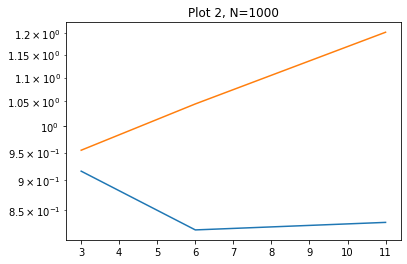

In [165]:
#Generate noisy data for polynomial of degree 5, with N = 500
d = 5
a = get_a(d)
x_train, y_train = draw_sample_with_noise(d,a,100)
x_test, y_test = draw_sample_with_noise(d,a,1000)

te_arr_1000 = []
ge_arr_1000 = []

#Generate empirical risk and generalization error
#For polynomials of various size [2,5,10]
for d in polynomials:
    train_error, gen_error = noisy_emp_and_gen_risk(d,x_train,y_train, x_test,y_test)
    te_arr_1000.append(train_error)
    ge_arr_1000.append(gen_error)
    
plt.plot(polynomials, te_arr_1000)
plt.plot(polynomials, ge_arr_1000)
plt.title("Plot 2, N=1000")
plt.yscale('log')